# Lecture 11

## 6.2.1 Bisection Exercises

1) The first step in implementing any search algorithm is to get an idea of what your
function looks like. For the present problem you do this by making a plot or a table of $f(E) = √10−E_B tan(√10−E_B)−√E_B$ versus $E_B$. Note from your plot some approximate values at which $f(EB) = 0$. Your program should be able to find more exact values for these zeros.

3) Write a program that implements the bisection algorithm and uses it to find some
solutions of (6.2).

4) Warning: Seeing that the tan function has singularities, some care is suggested. In fact,
your graphics program may not function accurately near these singularities. One cure is
to use a different, but equivalent, form of the equation. Show that an equivalent form of
(6.2) is $$√E cot(√10−E)−√10−E= 0. \tag{6.6}$$

6) Make a second plot of (6.6), which also has singularities but at different places. Use this
plot to choose some xvalues that bracket the zeros.

7) After you have found a solution, evaluate f(EB) and thus determine the precision of your
solution.

8) Compare the roots you find with those given by Maple or Mathematica.

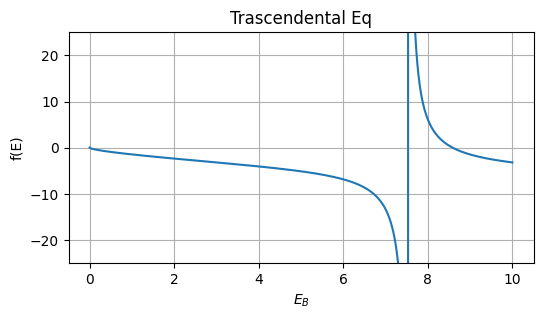

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def fE(EB):
    return np.sqrt(10-EB) * np.tan(np.sqrt(10-EB)) - np.sqrt(EB)

x_Values = np.linspace(0, 10, 1000)  # Only go up to 10 to avoid math errors
y_Values = []
for i in x_Values:
    y_Values.append(fE(i))

plt.figure(figsize=(6, 3))
plt.plot(x_Values,y_Values)
plt.ylim(-25, 25)
plt.xlabel(r"$E_B$")
plt.ylabel("f(E)")
plt.title("Trascendental Eq")
plt.grid()
plt.show()

$$
\sqrt{10−E_B} \quad tan(\sqrt{10−E_B})= \sqrt{E_B} \quad(\text{even}), \tag{6.2}
$$

In [2]:
def f(x): return np.sqrt(10-x) * np.tan(np.sqrt(10-x))   

def Bisection(Xminus, Xplus, Nmax, eps):          # Do not change    
   for it in range(0, Nmax):
       x = (Xplus +  Xminus)/2.                      
       print(" it =", it, " x = ", x, " f(x) =", f(x))
       if (f(Xplus)*f(x) > 0.): Xplus = x       # Change x+ to x
       else: Xminus =  x                        # Change x- to x
       if (abs(f(x) ) < eps):                   # Converged?
          print("\n Root found with precision eps = ", eps)
          break
       if it == Nmax-1: print ("\n No root after N iterations\n")
   return x


eps = 1e-3;  Nmax = 1000;  a = 8; b = 9    # Precision, [a,b]

root = Bisection(a, b, Nmax, eps)
print(" Root =", root)

 it = 0  x =  8.5  f(x) = 3.3967829356981
 it = 1  x =  8.25  f(x) = 5.2261094958990295
 it = 2  x =  8.125  f(x) = 6.703687723056202
 it = 3  x =  8.0625  f(x) = 7.699338372945305
 it = 4  x =  8.03125  f(x) = 8.28954165269961
 it = 5  x =  8.015625  f(x) = 8.612966230470503
 it = 6  x =  8.0078125  f(x) = 8.782573976022935
 it = 7  x =  8.00390625  f(x) = 8.869466214158201
 it = 8  x =  8.001953125  f(x) = 8.913449630600972
 it = 9  x =  8.0009765625  f(x) = 8.935577623366184
 it = 10  x =  8.00048828125  f(x) = 8.946675939745308
 it = 11  x =  8.000244140625  f(x) = 8.952233709285167
 it = 12  x =  8.0001220703125  f(x) = 8.955014750826923
 it = 13  x =  8.00006103515625  f(x) = 8.956405811283496
 it = 14  x =  8.000030517578125  f(x) = 8.957101476494861
 it = 15  x =  8.000015258789062  f(x) = 8.957449342854026
 it = 16  x =  8.000007629394531  f(x) = 8.957623284472929
 it = 17  x =  8.000003814697266  f(x) = 8.957710257392343
 it = 18  x =  8.000001907348633  f(x) = 8.957753744379

In [3]:
print(fE(root))
print(fE(8.589))

6.129370106972257
0.01809740818987482


3) Show Eq 6.2 = Eq 6.6

$$
\sqrt(10-x) \quad \tan(\sqrt{10-x}) = \sqrt{x} 
$$
$$
\sqrt(10-x) = \frac{\sqrt{x}}{tan(\sqrt{10-x})}
$$
$$
\sqrt(10-x) = \sqrt{x} \quad cot(\sqrt{10-x}) \\
$$

$$
\sqrt(x) cot(\sqrt(10−x))−\sqrt(10−x)= 0 \tag{6.6}
$$

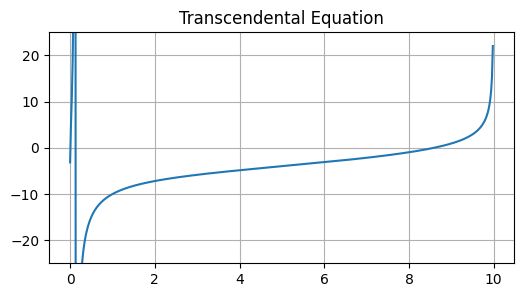

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cotan(x):
    # Return np.nan to avoid issues near singularities
    try:
        return 1 / np.tan(x)
    except ZeroDivisionError:
        return np.nan

def LHS(x):
    if np.sqrt(10 - x) == 0:
        return np.nan  # Avoid division by zero or tan approaching infinity
    return np.sqrt(x) * cotan(np.sqrt(10 - x)) - np.sqrt(10 - x)

x_Values = np.linspace(0, 10, 500)  # Only go up to 10 to avoid math errors
LHSa = []

for i in x_Values:
    LHSa.append(LHS(i))

plt.figure(figsize=(6, 3))
plt.plot(x_Values, LHSa)
#plt.xlabel(r"$\sqrt{x} \quad cot(\sqrt{10-x})$")
#plt.ylabel(r"$\sqrt(10-x)$")
# Adjust y-axis limits to prevent extreme spikes
plt.ylim(-25, 25)
plt.title("Transcendental Equation")
plt.grid()
plt.show()


In [5]:
# Bisection Method
def Bisection(Xminus, Xplus, Nmax=100, eps=1e-3):
    for it in range(0, Nmax):
        x = (Xplus + Xminus) / 2.  # Midpoint
        print(f"Iteration {it}: x = {x}, f(x) = {LHS(x)}")
        if LHS(Xplus) * LHS(x) > 0:
            Xplus = x  # Narrow the search range
        else:
            Xminus = x
        if abs(LHS(x)) < eps:  # Convergence check
            print(f"\nRoot found with precision {eps}: {x}")
            break
        if it == Nmax - 1:
            print("\nNo root found after N iterations.")
    return x

# Adjust the initial bracketing interval based on your plot
a, b = 8.0, 9.0  # Refined interval based on your plot observation

root = Bisection(a, b)
print(f"Root = {root}")

Iteration 0: x = 8.5, f(x) = -0.17354016332931788
Iteration 1: x = 8.75, f(x) = 0.3209534261982363
Iteration 2: x = 8.625, f(x) = 0.06281716092993817
Iteration 3: x = 8.5625, f(x) = -0.057809067054070296
Iteration 4: x = 8.59375, f(x) = 0.0018609869548624758
Iteration 5: x = 8.578125, f(x) = -0.02813073123925225
Iteration 6: x = 8.5859375, f(x) = -0.013174542465707928
Iteration 7: x = 8.58984375, f(x) = -0.005666758528423577
Iteration 8: x = 8.591796875, f(x) = -0.0019053889427707027
Iteration 9: x = 8.5927734375, f(x) = -2.282778231332827e-05

Root found with precision 0.001: 8.5927734375
Root = 8.5927734375


In [6]:
print(LHS(root))
print(LHS(8.599))

-2.282778231332827e-05
0.012009944322416866


In [7]:
# This is an example from google AI to use the fsolve.
# You can adapt it to your functions and choose an
# appropriate range. Note the method is similar whatever
# algorithm is implemented whether it is Bisection,
# Newton-Raphson, or some other method.
import numpy as np
from scipy.optimize import fsolve

# Initial guess for the root
initial_guess = 8.0
# Find the root using fsolve
root = fsolve(LHS, initial_guess)
# Print the root
print("Root:", root[0])
# Find multiple roots by iterating through different initial guesses
for i in range(0, 10):
    initial_guess = i
    root = fsolve(LHS, initial_guess)
print(f"Root with initial guess {initial_guess}: {root[0]}")


Root: 8.592785275229838
Root with initial guess 9: 8.592785275229838


## 6.3.1 Search + Backtracking (Newton–Raphson)

1) Use the Newton–Raphson algorithm to find some energies EB that are solutions of (6.2).
Compare this solution with the one found with the bisection algorithm.

3) Again,notice that the 10 in this equation is proportional to the strength of the potential
that causes the binding. See if making the potential deeper, say, by changing the 10 to
a 20 or a 30, produces more or deeper bound states. (Note that in contrast to the bisection algorithm, your initial guess must be closer to the answer for the Newton–Raphson algorithm to work.)

4) Modify your algorithm to include backtracking and then try it out on some difficult
cases.
5) Evaluate f(EB) and thus determine directly the precision of your solution.

In [8]:
# Newton-Raphson Method
def Newton_Raphson(initial_guess, tol=1e-6, max_iter=100):
    x = initial_guess
    for it in range(max_iter):
        fx = LHS(x)
        f_prime_x = LHS_prime(x)
        
        # Avoid division by zero or too small derivative
        if f_prime_x == 0 or np.isnan(f_prime_x):
            print(f"Derivative is zero or undefined at x = {x}.")
            break
        
        # Newton-Raphson update
        x_new = x - fx / f_prime_x
                
        # Convergence check
        if abs(LHS(x_new)) < tol:
            print(f"\nRoot found with precision {tol}: x = {x_new}")
            return x_new
        
        x = x_new
        print(f"Iteration {it}: x = {x}, f(x) = {LHS(x)}")
        
        # Maximum iterations reached
        if it == max_iter - 1:
            print("\nNo root found after N iterations.")
            return x
    
    return x

In [9]:
#lets use LHS of eq 6.6 instead of 6.2

#but i need its derivative (approximation) eq 6.12
def LHS_prime(x, epsilon=1e-6):
    return (LHS(x + epsilon) - LHS(x - epsilon)) / (2 * epsilon)


# Newton-Raphson method
initial_guess = 8.0  
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Newton-Raphson solution: {EB_newton}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")
    
# Bisection method
a, b = 8, 9  # Interval where root is known to exist
try:
    EB_bisection = Bisection(a, b)
    print(f"Bisection solution: {EB_bisection}")
except ValueError as e:
    print(f"Bisection failed: {e}")

Iteration 0: x = 8.688057759107133, f(x) = 0.19001757048449042
Iteration 1: x = 8.596003143452998, f(x) = 0.006212153595843484
Iteration 2: x = 8.59278880901076, f(x) = 6.814550197908886e-06

Root found with precision 1e-06: x = 8.592785275234093
Newton-Raphson solution: 8.592785275234093
Iteration 0: x = 8.5, f(x) = -0.17354016332931788
Iteration 1: x = 8.75, f(x) = 0.3209534261982363
Iteration 2: x = 8.625, f(x) = 0.06281716092993817
Iteration 3: x = 8.5625, f(x) = -0.057809067054070296
Iteration 4: x = 8.59375, f(x) = 0.0018609869548624758
Iteration 5: x = 8.578125, f(x) = -0.02813073123925225
Iteration 6: x = 8.5859375, f(x) = -0.013174542465707928
Iteration 7: x = 8.58984375, f(x) = -0.005666758528423577
Iteration 8: x = 8.591796875, f(x) = -0.0019053889427707027
Iteration 9: x = 8.5927734375, f(x) = -2.282778231332827e-05

Root found with precision 0.001: 8.5927734375
Bisection solution: 8.5927734375


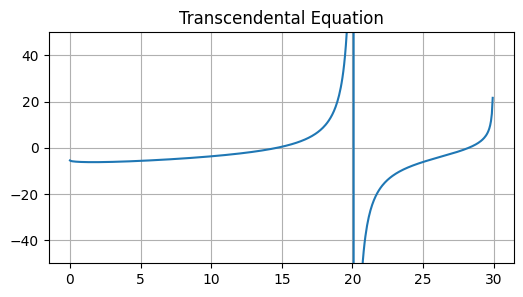

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def cotan(x):
    # Return np.nan to avoid issues near singularities
    try:
        return 1 / np.tan(x)
    except ZeroDivisionError:
        return np.nan

def LHS(x):
    if np.sqrt(30 - x) == 0:
        return np.nan  # Avoid division by zero or tan approaching infinity
    return np.sqrt(x) * cotan(np.sqrt(30 - x)) - np.sqrt(30 - x)

x_Values = np.linspace(0, 30, 500)  
LHSa = []

for i in x_Values:
    LHSa.append(LHS(i))

plt.figure(figsize=(6, 3))
plt.plot(x_Values, LHSa)
#plt.xlabel(r"$\sqrt{x} \quad cot(\sqrt{10-x})$")
#plt.ylabel(r"$\sqrt(10-x)$")
# Adjust y-axis limits to prevent extreme spikes
plt.ylim(-50, 50)
plt.title("Transcendental Equation")
plt.grid()
plt.show()


In [48]:
# Newton-Raphson method
initial_guess = 8.0  
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")
    
# Bisection method
a, b = 10, 15  # Interval where root is known to exist
try:
    EB_bisection = Bisection(a, b)
    print(f"Interval: {a,b}")
except ValueError as e:
    print(f"Bisection failed: {e}")


print("-------------------------------------------------------")


# Newton-Raphson method
initial_guess = 26.0  
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")
    
# Bisection method
a, b = 26, 29  # Interval where root is known to exist
try:
    EB_bisection = Bisection(a, b)
    print(f"Interval: {a,b}")
except ValueError as e:
    print(f"Bisection failed: {e}")

Iteration 0: x = 19.22975254986639, f(x) = 27.788093128120405
Iteration 1: x = 18.439584258607518, f(x) = 12.842075806821908
Iteration 2: x = 17.187094788259305, f(x) = 5.274329758988715
Iteration 3: x = 15.729127652767435, f(x) = 1.5927970687101962
Iteration 4: x = 14.839564056357796, f(x) = 0.2244875080863049
Iteration 5: x = 14.670418016131805, f(x) = 0.005509094221463506
Iteration 6: x = 14.666056155470507, f(x) = 3.445309348037995e-06

Root found with precision 1e-06: x = 14.66605342420987
Guess: 8.0
Iteration 0: x = 12.5, f(x) = -2.116095676558315
Iteration 1: x = 13.75, f(x) = -1.0247961868968605
Iteration 2: x = 14.375, f(x) = -0.35257394048621027
Iteration 3: x = 14.6875, f(x) = 0.027136931660107777
Iteration 4: x = 14.53125, f(x) = -0.16683621480628386
Iteration 5: x = 14.609375, f(x) = -0.07092102931082289
Iteration 6: x = 14.6484375, f(x) = -0.02216540128977984
Iteration 7: x = 14.66796875, f(x) = 0.0024167217249839723
Iteration 8: x = 14.658203125, f(x) = -0.00989151169596

In [49]:
print(LHS(EB_newton))
print(LHS(EB_bisection))

1.7594623535899245e-09
0.00024643436141857933


In [50]:
# NewtonRaphson with backtracking

# Newton-Raphson Method
def Newton_RaphsonB(initial_guess, tol=1e-6, max_iter=100, backtrack_factor=0.5):
    x = initial_guess
    for it in range(max_iter):
        fx = LHS(x)
        f_prime_x = LHS_prime(x)
        
        # Avoid division by zero or too small derivative
        if f_prime_x == 0 or np.isnan(f_prime_x):
            print(f"Derivative is zero or undefined at x = {x}.")
            break
        
        # Newton-Raphson update
        x_new = x - fx / f_prime_x
        
        # Backtracking if the next guess does not reduce the error sufficiently
        if abs(LHS(x_new)) > abs(fx):
            print(f"Backtracking: Reducing step size at iteration {it}")
            x_new = x - backtrack_factor * (fx / f_prime_x)    

        
        # Convergence check
        if abs(LHS(x_new)) < tol:
            print(f"\nRoot found with precision {tol}: x = {x_new}")
            return x_new
        
        x = x_new
        print(f"Iteration {it}: x = {x}, f(x) = {LHS(x)}")
        
        # Maximum iterations reached
        if it == max_iter - 1:
            print("\nNo root found after N iterations.")
            return x
    
    return x

In [51]:
# test a poorly guessed solution with both

# Newton-Raphson method
initial_guess = 20
try:
    EB_newton = Newton_Raphson(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")

try:
    EB_newtonB = Newton_RaphsonB(initial_guess)
    print(f"Guess: {initial_guess}")
except ValueError as e:
    print(f"Newton-Raphson failed: {e}")

Iteration 0: x = 19.87155930642438, f(x) = 105.67235343555197
Iteration 1: x = 19.620683458297766, f(x) = 51.95851783710657
Iteration 2: x = 19.143701559494453, f(x) = 25.02283052928944
Iteration 3: x = 18.2916386990999, f(x) = 11.442809197267948
Iteration 4: x = 16.980378879014026, f(x) = 4.571107432700275
Iteration 5: x = 15.551996053251315, f(x) = 1.2858865097074141
Iteration 6: x = 14.785213458141586, f(x) = 0.15293498484226742
Iteration 7: x = 14.668104620452834, f(x) = 0.0025882109090118455

Root found with precision 1e-06: x = 14.666054027356827
Guess: 20
Iteration 0: x = 19.87155930642438, f(x) = 105.67235343555197
Iteration 1: x = 19.620683458297766, f(x) = 51.95851783710657
Iteration 2: x = 19.143701559494453, f(x) = 25.02283052928944
Iteration 3: x = 18.2916386990999, f(x) = 11.442809197267948
Iteration 4: x = 16.980378879014026, f(x) = 4.571107432700275
Iteration 5: x = 15.551996053251315, f(x) = 1.2858865097074141
Iteration 6: x = 14.785213458141586, f(x) = 0.1529349848422

In [52]:
LHS(EB_newtonB)

np.float64(7.608318481899801e-07)

## 6.7.2 Linear Quadratic Fit

### 6.7.2.1 Linear Quadratic Fit Assessment
1) Fitthequadratic(6.52)tothefollowingdatasets[givenas(x1,y1),(x2,y2),…].Ineach
case indicate the values found for the as, the number of degrees of freedom, and the
valueof𝜒2
.
a) (0,1)
b) (0,1),(1,3)
c) (0,1),(1,3),(2,7)
d) (0,1),(1,3),(2,7),(3,15)
2) Findafittothelastsetofdatatothefunctiony= Ae−bx2
.
Hint:Ajudiciouschangeofvariableswillpermityoutoconvertthistoalinearfit.Does
aminimum𝜒2 stillhavemeaninghere?

## 6.8 Nonlinear Fit to a Resonance

Nonlinear Fit Exercise UsetheNewton–RaphsonalgorithmasoutlinedinSection6.8
toconductanonlinearsearchforthebest-fitparametersoftheBreit–Wignertheory(6.58)to
thedatainTable6.1.Comparethededucedvaluesof(fr,ER,Γ)tothatobtainedbyinspection
ofthegraph.